In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets # 이미 train, test 가 나눠져 있다.
from keras.utils import np_utils

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [17]:
label = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat',
         'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

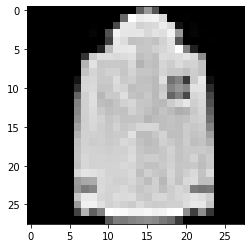

4
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  94 152  84   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 104 254 235 240 242 219
    0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0  73 231 230 210 215 218 236
  219  19   0   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5   0  82 244 229 229 230 217 228 222
  242 153   0   5   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  64 232 220 193 195 199 194 210
  225  86   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  32 187 230 231 233 198 199 208 214
  223 253 130  32   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  53 203 221 221 217 220 224 191 197 191 220
  217 220 228 217 142   0   0   0   0   0]
 [  0   0   0   0   0   0   0 179 226 199 201 201 199 216 180 193 190 213
  205 219 209 212 195   0   0   0   0   0]
 [  0   0   0   0   0   0   0 196 213 202 209 209 198 211 197 

In [4]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap = 'gray')
plt.show()
print(Y_train[my_sample]) # Y 값 one hot, scailing
print(X_train[my_sample]) # 이미지는 각자의 픽셀의 값을 숫자로 나타낸 것

In [5]:
y_train = np_utils.to_categorical(Y_train) #ont hot을 자동으로 해주는 함수, to_categorical, OneHotEncoder, get_dummies 
y_test = np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [6]:
x_train = X_train.reshape(-1, 28 * 28)
x_test = X_test.reshape(-1, 28 * 28)
x_train = x_train / 255 # MinMaxScaler
x_test = x_test / 255
print(x_train.shape)

(60000, 784)


In [7]:
model = Sequential()
model.add(Dense(128, input_dim = 28 * 28, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [12]:
fit_hist = model.fit(x_train, y_train, batch_size=128, epochs = 20, validation_split = 0.2, verbose = 1)

Epoch 1/50
375/375 [==============================] - 2s 6ms/step - loss: 0.2000 - accuracy: 0.9234 - val_loss: 0.3284 - val_accuracy: 0.8864
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1866 - accuracy: 0.9303 - val_loss: 0.3386 - val_accuracy: 0.8838
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1868 - accuracy: 0.9286 - val_loss: 0.3293 - val_accuracy: 0.8906
Epoch 4/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1794 - accuracy: 0.9324 - val_loss: 0.3370 - val_accuracy: 0.8894
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 0.1750 - accuracy: 0.9335 - val_loss: 0.3287 - val_accuracy: 0.8894
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1693 - accuracy: 0.9361 - val_loss: 0.3452 - val_accuracy: 0.8911
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.1639 - accuracy: 0.9382 - val_loss: 0.3390 - val_accuracy: 0.8898
Epoch 

In [14]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Final test set accurecy', score[1])

Final test set accurecy 0.8885999917984009


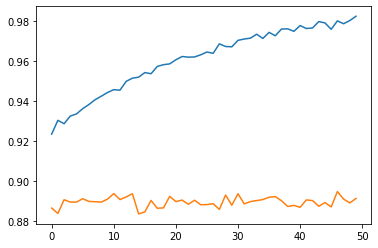

In [15]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

2
pullover
[[9.1112527e-11 2.0441560e-17 1.5523300e-03 1.4237226e-18 9.7658283e-01
  5.9764930e-14 2.1864854e-02 1.9216132e-15 6.6526253e-18 7.0053761e-18]]
coat


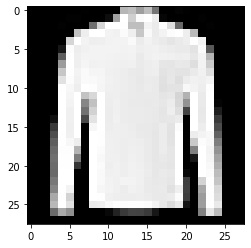

In [23]:
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap = 'gray')
print(Y_test[my_sample])
print(label[Y_test[my_sample]])
pred = model.predict(x_test[my_sample].reshape(-1, 28 * 28))
print(pred)
print(label[np.argmax(pred)])

지금까지는 일반적인 인공신경망, Dense(조밀 신경말)<br>
앞으로 할 것은 CNN(Convolutional Neural Networks)-> 이미지에 특화된 알고리즘
